In [3]:
import numpy as np
from config import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
train_labels = np.load(time_series_dir + 'train_labels.npy')
val_labels = np.load(time_series_dir + 'val_labels.npy')
train_preds = np.load(time_series_dir + 'train_preds.npy')
val_preds = np.load(time_series_dir + 'val_preds.npy')
train_inputs = np.load(time_series_dir + 'train_inputs.npy')
val_inputs = np.load(time_series_dir + 'val_inputs.npy')

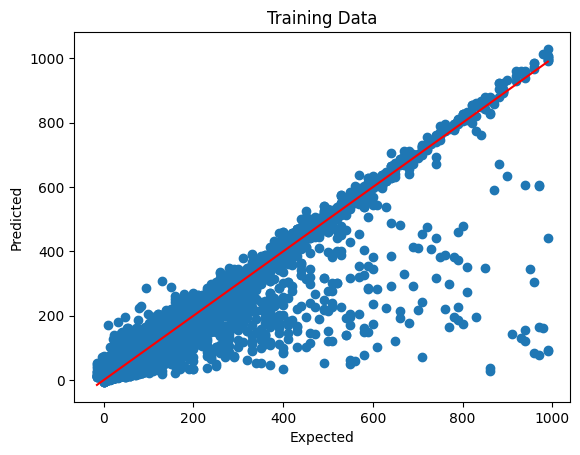

In [4]:
plt.scatter(train_labels, train_preds)
plt.plot([train_labels.min(), train_labels.max()], [train_labels.min(), train_labels.max()], 'r')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Training Data')
plt.show()

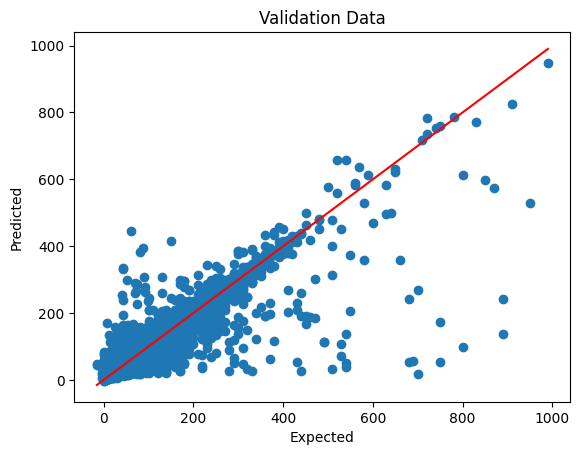

In [5]:
plt.scatter(val_labels, val_preds)
plt.plot([val_labels.min(), val_labels.max()], [val_labels.min(), val_labels.max()], 'r')
plt.xlabel('Expected')
plt.ylabel('Predicted')
plt.title('Validation Data')
plt.show()

In [5]:
lm = LinearRegression()
lm.fit(train_inputs, train_preds)

LinearRegression()

In [6]:
r2_score(train_preds, lm.predict(train_inputs))

0.14409993954907852

In [7]:
r2_score(val_preds, lm.predict(val_inputs))

0.14557784272055885

In [10]:
var_idx = [7, 9, 10, 16, 18]
lm1 = LinearRegression()
lm1.fit(train_inputs[:, var_idx], train_preds)

LinearRegression()

In [21]:
r2_score(train_preds, lm1.predict(train_inputs[:, var_idx]))

0.04959381173788868

In [22]:
r2_score(val_preds, lm1.predict(val_inputs[:, var_idx]))

0.053608816731243625

In [23]:
lm1.coef_ / 1000000000

array([ 9.75761228e-03, -2.26212153e+00,  1.36092532e+01,  1.57025284e+00,
        8.77425112e-02])

In [24]:
lm2 = LinearRegression()
new_train_inputs = train_inputs[:, var_idx]
new_train_inputs[:, 3] *= 1.375
lm2.fit(new_train_inputs, train_preds)

LinearRegression()

In [25]:
r2_score(train_preds, lm2.predict(new_train_inputs))

0.04959381173788868

In [27]:
new_val_inputs = val_inputs[:, var_idx]
new_val_inputs[:, 3] *= 1.375
r2_score(val_preds, lm2.predict(new_val_inputs))

0.053608816731243625

In [28]:
lm2.coef_ / 1000000000

array([ 9.75761228e-03, -2.26212153e+00,  1.36092532e+01,  1.14200207e+00,
        8.77425112e-02])